In [2]:
from sklearn.datasets import fetch_mldata
# 70k small images of digits handwritten by highschool

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [7]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [16]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### Important points about data
* In total, 70k hw digits
* Each digit is represented by 28 * 28 matrix

In [12]:
num = mnist.data[0].reshape((28,28))

In [11]:
mnist.target[0]

0.0

In [18]:

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

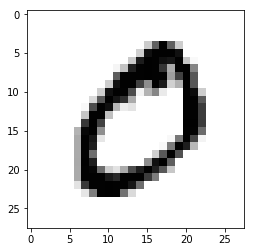

In [19]:
plt.imshow(num, cmap=matplotlib.cm.binary)

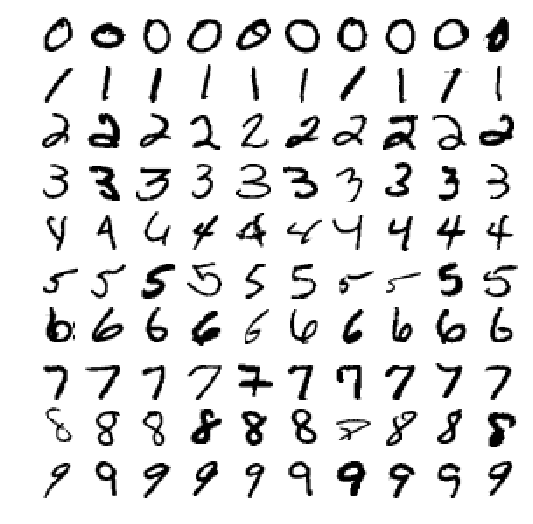

In [23]:

X, y = mnist["data"], mnist["target"]
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

plt.show()

### Splitting Data

In [25]:
import numpy as np


X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [26]:
X_train.shape

(60000, 784)

In [27]:
shuffle_index

array([48955, 54352, 30977, ..., 38038, 56459, 52402])

In [28]:
shuffle_index.shape

(60000,)

In [29]:
n = np.array([11,22,33])

In [32]:
idx = np.random.permutation(3)

In [33]:
n[idx]

array([22, 11, 33])

### Training a Binary Classifier
* Stochastic Gradient Descent (SGD) - handles large datasets efficiently - suited for online learning

In [35]:
from sklearn.linear_model import SGDClassifier

In [36]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [37]:
y_train_5

array([False, False,  True, ..., False, False, False], dtype=bool)

In [38]:
y_test

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [40]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
# Model prep done, use this to do future prediction

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [41]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.95855,  0.9561 ,  0.96215])

In [44]:
cross_val_score(sgd_clf, X_test, y_test_5, cv=3, scoring="accuracy")

array([ 0.89142172,  0.87248725,  0.93609361])

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
from sklearn.model_selection import cross_val_predict

In [47]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [48]:
confusion_matrix(y_train_5, y_train_pred)

array([[53811,   768],
       [ 1696,  3725]])

In [50]:
#TP - data was 5, & predicted 5
#FP - data was not 5, but predicted as 5
#Precision = TP / ( TP + FP)

In [51]:
from sklearn.metrics import precision_score, recall_score

In [53]:
precision_score(y_train_5,y_train_pred)

0.82906743823725793

In [54]:
import seaborn as sns

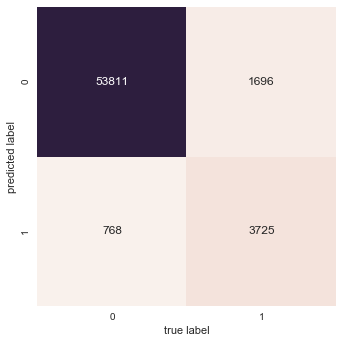

In [55]:
mat = confusion_matrix(y_train_5, y_train_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [56]:
recall_score(y_train_5, y_train_pred)

0.68714259361741381

In [58]:
#recall = TP/(TP + FN)

In [59]:
recall_score(y_train_5,y_train_pred)

0.68714259361741381

In [60]:
from sklearn.metrics import f1_score

In [61]:
f1_score(y_train_5,y_train_pred)

0.75146257817228157